In [1]:
import pandas as pd

# Obtener parejas y reportes

In [2]:
df_report_pairs = pd.read_pickle('data/raw_report_pairs.pkl')
df_reports = pd.read_pickle('data/raw_reports.pkl')

In [3]:
df_report_pairs.sample(3)

,type,id_M,id_D,statusM,statusD,componentM,componentD,summaryM,summaryD,commentsM,commentsD,text1M,text1D,text2M,text2D,text3M,text3D,text4M,text4D
337,master,1471546,1685266,VERIFIED,RESOLVED,Bookmarks & History,Messaging System,New Library info pane overlaps the list of boo...,Add InfoBar template capabilities to MS,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:6...,We need a wrapper around the InfoBar to allow ...,New Library info pane overlaps the list of boo...,Add InfoBar template capabilities to MS,New Library info pane overlaps the list of boo...,Add InfoBar template capabilities to MS Messag...,New Library info pane overlaps the list of boo...,Add InfoBar template capabilities to MS We nee...,New Library info pane overlaps the list of boo...,Add InfoBar template capabilities to MS Messag...
330,master,1775851,1686133,NEW,RESOLVED,New Tab Page,New Tab Page,Intermittent browser/components/newtab/test/br...,Fix and re-enable browser/base/content/test/ta...,,This browser/base/content/test/tabs/browser_ne...,Intermittent browser/components/newtab/test/br...,Fix and re-enable browser/base/content/test/ta...,Intermittent browser/components/newtab/test/br...,Fix and re-enable browser/base/content/test/ta...,Intermittent browser/components/newtab/test/br...,Fix and re-enable browser/base/content/test/ta...,Intermittent browser/components/newtab/test/br...,Fix and re-enable browser/base/content/test/ta...
234,master,1327452,1775851,RESOLVED,NEW,Downloads Panel,New Tab Page,"Some widgets in Firefox (downloads window, pag...",Intermittent browser/components/newtab/test/br...,">>> My Info: Win7_64, Nightly 49, 32bit, I...",,"Some widgets in Firefox (downloads window, pag...",Intermittent browser/components/newtab/test/br...,"Some widgets in Firefox (downloads window, pag...",Intermittent browser/components/newtab/test/br...,"Some widgets in Firefox (downloads window, pag...",Intermittent browser/components/newtab/test/br...,"Some widgets in Firefox (downloads window, pag...",Intermittent browser/components/newtab/test/br...


In [4]:
df_reports.sample(3)

,report_id,creation_time,status,component,dupe_of,summary,comments,text1,text2,text3,text4
856,1239497,2016-01-13 23:20:18,RESOLVED,Address Bar,764062.0,Pre-fetching a URL with a port number in Histo...,User Agent: Mozilla/5.0 (X11; Linux x86_64; rv...,Pre-fetching a URL with a port number in Histo...,Pre-fetching a URL with a port number in Histo...,Pre-fetching a URL with a port number in Histo...,Pre-fetching a URL with a port number in Histo...
680,1556537,2019-06-03 20:17:09,RESOLVED,General,1555897.0,Intermittent [TV] browser/base/content/test/ge...,**Filed by:** cbrindusan [at] mozilla.com\n**P...,Intermittent [TV] browser/base/content/test/ge...,Intermittent [TV] browser/base/content/test/ge...,Intermittent [TV] browser/base/content/test/ge...,Intermittent [TV] browser/base/content/test/ge...
216,1517642,2019-01-03 23:44:04,RESOLVED,Installer,NaN,Make the installer and updater disable the lau...,This is so that we can do a controlled deploym...,Make the installer and updater disable the lau...,Make the installer and updater disable the lau...,Make the installer and updater disable the lau...,Make the installer and updater disable the lau...


# Preprocesamiento

## StopWords

In [5]:
from nltk.corpus import stopwords

CUSTOM_WORDS = ['info']

def remove_stopwords(sentence: list) -> list:
    return [w for w in sentence if w not in stopwords.words('english')]

## Caracteres extra

In [6]:
from string import punctuation
EXTRA_CHARACTERS = [p for p in punctuation if p not in list('_')]
ALLOWED_URL_CHARS = [':', '/', '?', '=', '&', '#']
URL_FORBIDDEN_CHARS = [c for c in EXTRA_CHARACTERS if c not in ALLOWED_URL_CHARS]

In [7]:
def process_token(token: str) -> list:
    if token.isdigit():
        return []

    token = token.lower()

    if token.startswith('http'):
        token = ''.join([w if w not in URL_FORBIDDEN_CHARS else '' for w in token])
    else:
        token = ''.join([w if w not in EXTRA_CHARACTERS else ' ' for w in token])

    token = token.strip()

    return token.split() if len(token.split()) > 1 else [token]

In [8]:
def remove_extra_characters(sentence: str) -> list:

    sentence_to_process = sentence.split() # Generar tokens por espacios
    sentence_processed = []

    # Eliminar tokens que sean solo números
    sentence_processed = [w for w in sentence_to_process if not w.isdigit()]
    # Eliminar tokens que sean solo puntuación
    sentence_processed = [w for w in sentence_processed if w not in list(punctuation)]

    result = []
    for w in sentence_processed:
        token = process_token(w)
        if len(token) > 1:
            for subtoken in token:
                result.extend(process_token(subtoken))
        else:
            result.extend(token)
    
    return result

## Lematización

In [9]:
import nltk
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer

LEMMATIZER = WordNetLemmatizer()
LEMMATIZER_PASS_TOKENS = ['js']

def lemmatize(sentence: list) -> list:
    return [LEMMATIZER.lemmatize(w) if w not in LEMMATIZER_PASS_TOKENS else w for w in sentence ]

[nltk_data] Downloading package omw-1.4 to /home/ajburri/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [10]:
from nltk.stem import SnowballStemmer
STEMMER = SnowballStemmer('english')
STEMMER_PASS_TOKENS = ['js']

def stem(sentence: list) -> list:
    return [STEMMER.stem(w) if w not in STEMMER_PASS_TOKENS else w for w in sentence]

# Aplicación y resultados

In [11]:
def preprocess_with_lemmatizer(sentence: str) -> str:
    # Pasar a minusculas
    p_sentence = sentence.lower()
    # Eliminar puntuación
    p_sentence = remove_extra_characters(p_sentence)
    # Eliminar palabras que no sean stopwords
    p_sentence = remove_stopwords(p_sentence)
    # Lematizar
    p_sentence = lemmatize(p_sentence)
    # Últimas modificaciones
    p_sentence = [t for t in p_sentence if t not in ['', ' ']]
    # Unir en una sola cadena
    # p_sentence = ' '.join(p_sentence)
    return p_sentence

In [12]:
def preprocess_with_stemmer(sentence: str) -> str:
    # Pasar a minusculas
    p_sentence = sentence.lower()
    # Eliminar puntuación
    p_sentence = remove_extra_characters(p_sentence)
    # Eliminar palabras que no sean stopwords
    p_sentence = remove_stopwords(p_sentence)
    # Lematizar
    p_sentence = stem(p_sentence)
    # Últimas modificaciones
    p_sentence = [t for t in p_sentence if t not in ['', ' ']]
    # Unir en una sola cadena
    # p_sentence = ' '.join(p_sentence)
    return p_sentence

In [13]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

## Conjunto total

In [14]:
df_reports['tokens1L'] = df_reports['text1'].apply(preprocess_with_lemmatizer)
df_reports['tokens2L'] = df_reports['text2'].apply(preprocess_with_lemmatizer)
df_reports['tokens3L'] = df_reports['text3'].apply(preprocess_with_lemmatizer)
df_reports['tokens4L'] = df_reports['text4'].apply(preprocess_with_lemmatizer)
df_reports['tokens1S'] = df_reports['text1'].apply(preprocess_with_stemmer)
df_reports['tokens2S'] = df_reports['text2'].apply(preprocess_with_stemmer)
df_reports['tokens3S'] = df_reports['text3'].apply(preprocess_with_stemmer)
df_reports['tokens4S'] = df_reports['text4'].apply(preprocess_with_stemmer)
df_reports.sample(3)

,report_id,creation_time,status,component,dupe_of,summary,comments,text1,text2,text3,text4,tokens1L,tokens2L,tokens3L,tokens4L,tokens1S,tokens2S,tokens3S,tokens4S
178,1554264,2019-05-24 17:41:12,RESOLVED,Tooling & Investigations,NaN,Perma shippable opt browser_all_files_referenc...,Beta-as-release simulation: https://treeherder...,Perma shippable opt browser_all_files_referenc...,Perma shippable opt browser_all_files_referenc...,Perma shippable opt browser_all_files_referenc...,Perma shippable opt browser_all_files_referenc...,"[perma, shippable, opt, browser_all_files_refe...","[perma, shippable, opt, browser_all_files_refe...","[perma, shippable, opt, browser_all_files_refe...","[perma, shippable, opt, browser_all_files_refe...","[perma, shippabl, opt, browser_all_files_refer...","[perma, shippabl, opt, browser_all_files_refer...","[perma, shippabl, opt, browser_all_files_refer...","[perma, shippabl, opt, browser_all_files_refer..."
581,1687637,2021-01-20 09:53:53,RESOLVED,Untriaged,1686002.0,Event retargeting though target exists,User Agent: Mozilla/5.0 (Windows NT 10.0; Win6...,Event retargeting though target exists,Event retargeting though target exists Untriaged,Event retargeting though target exists User Ag...,Event retargeting though target exists Untriaged,"[event, retargeting, though, target, exists]","[event, retargeting, though, target, exists, u...","[event, retargeting, though, target, exists, u...","[event, retargeting, though, target, exists, u...","[event, retarget, though, target, exist]","[event, retarget, though, target, exist, untriag]","[event, retarget, though, target, exist, user,...","[event, retarget, though, target, exist, untriag]"
334,1423256,2017-12-05 16:58:27,VERIFIED,New Tab Page,NaN,Missing favicon and/or title for some tabs (na...,[Affected versions]:\n- Firefox 59.0a1 Build I...,Missing favicon and/or title for some tabs (na...,Missing favicon and/or title for some tabs (na...,Missing favicon and/or title for some tabs (na...,Missing favicon and/or title for some tabs (na...,"[missing, favicon, title, tab, navigate, sessi...","[missing, favicon, title, tab, navigate, sessi...","[missing, favicon, title, tab, navigate, sessi...","[missing, favicon, title, tab, navigate, sessi...","[miss, favicon, titl, tab, navig, session, res...","[miss, favicon, titl, tab, navig, session, res...","[miss, favicon, titl, tab, navig, session, res...","[miss, favicon, titl, tab, navig, session, res..."


In [15]:
unique_tokens1L = set(word for tokens in df_reports['tokens1L'] for word in tokens)
unique_tokens2L = set(word for tokens in df_reports['tokens2L'] for word in tokens)
unique_tokens3L = set(word for tokens in df_reports['tokens3L'] for word in tokens)
unique_tokens4L = set(word for tokens in df_reports['tokens4L'] for word in tokens)
unique_tokens1S = set(word for tokens in df_reports['tokens1S'] for word in tokens)
unique_tokens2S = set(word for tokens in df_reports['tokens2S'] for word in tokens)
unique_tokens3S = set(word for tokens in df_reports['tokens3S'] for word in tokens)
unique_tokens4S = set(word for tokens in df_reports['tokens4S'] for word in tokens)

print(f"Número de tokens únicos con lemmatizer en Conjunto 1: {len(unique_tokens1L)}")
print(f"Número de tokens únicos con lemmatizer en Conjunto 2: {len(unique_tokens2L)}")
print(f"Número de tokens únicos con lemmatizer en Conjunto 3: {len(unique_tokens3L)}")
print(f"Número de tokens únicos con lemmatizer en Conjunto 4: {len(unique_tokens4L)}")
print('-'*70)
print(f"Número de tokens únicos con stemmer en Conjunto 1: {len(unique_tokens1S)}")
print(f"Número de tokens únicos con stemmer en Conjunto 2: {len(unique_tokens2S)}")
print(f"Número de tokens únicos con stemmer en Conjunto 3: {len(unique_tokens3S)}")
print(f"Número de tokens únicos con stemmer en Conjunto 4: {len(unique_tokens4S)}")

Número de tokens únicos con lemmatizer en Conjunto 1: 2012
Número de tokens únicos con lemmatizer en Conjunto 2: 2041
Número de tokens únicos con lemmatizer en Conjunto 3: 4986
Número de tokens únicos con lemmatizer en Conjunto 4: 2411
----------------------------------------------------------------------
Número de tokens únicos con stemmer en Conjunto 1: 1715
Número de tokens únicos con stemmer en Conjunto 2: 1734
Número de tokens únicos con stemmer en Conjunto 3: 4061
Número de tokens únicos con stemmer en Conjunto 4: 2012


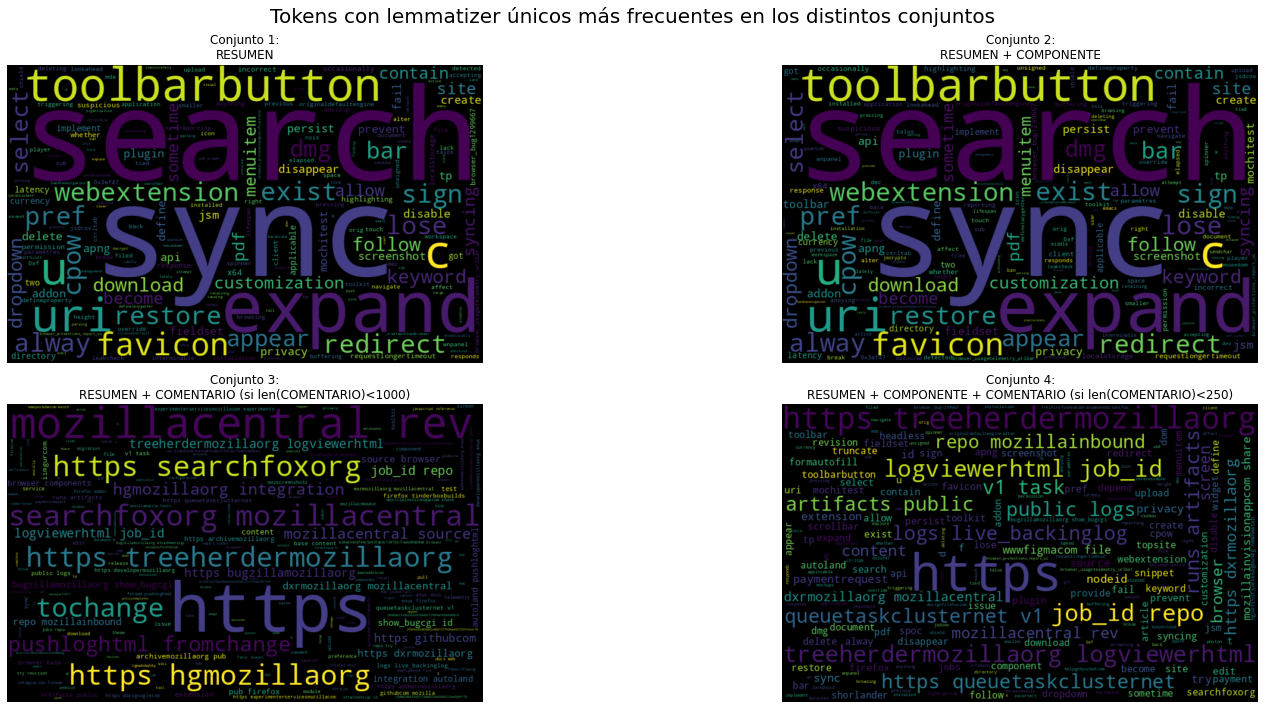

In [16]:
tokens1L_wordcloud = WordCloud(width=800, height=500, random_state=21, max_words=200).generate(' '.join(unique_tokens1L))
tokens2L_wordcloud = WordCloud(width=800, height=500, random_state=21, max_words=200).generate(' '.join(unique_tokens2L))
tokens3L_wordcloud = WordCloud(width=800, height=500, random_state=21, max_words=200).generate(' '.join(unique_tokens3L))
tokens4L_wordcloud = WordCloud(width=800, height=500, random_state=21, max_words=200).generate(' '.join(unique_tokens4L))

fig, axs = plt.subplots(2,2, figsize=(25,10))

axs[0,0].imshow(tokens1L_wordcloud, interpolation='bilinear')
axs[0,0].set_title('Conjunto 1:\nRESUMEN')
axs[0,0].axis('off')

axs[0,1].imshow(tokens2L_wordcloud, interpolation='bilinear')
axs[0,1].set_title('Conjunto 2:\nRESUMEN + COMPONENTE')
axs[0,1].axis('off')

axs[1,0].imshow(tokens3L_wordcloud, interpolation='bilinear')
axs[1,0].set_title('Conjunto 3:\nRESUMEN + COMENTARIO (si len(COMENTARIO)<1000)')
axs[1,0].axis('off')

axs[1,1].imshow(tokens4L_wordcloud, interpolation='bilinear')
axs[1,1].set_title('Conjunto 4:\nRESUMEN + COMPONENTE + COMENTARIO (si len(COMENTARIO)<250)')
axs[1,1].axis('off')

fig.suptitle('Tokens con lemmatizer únicos más frecuentes en los distintos conjuntos', fontsize=20)
fig.tight_layout()
plt.show()


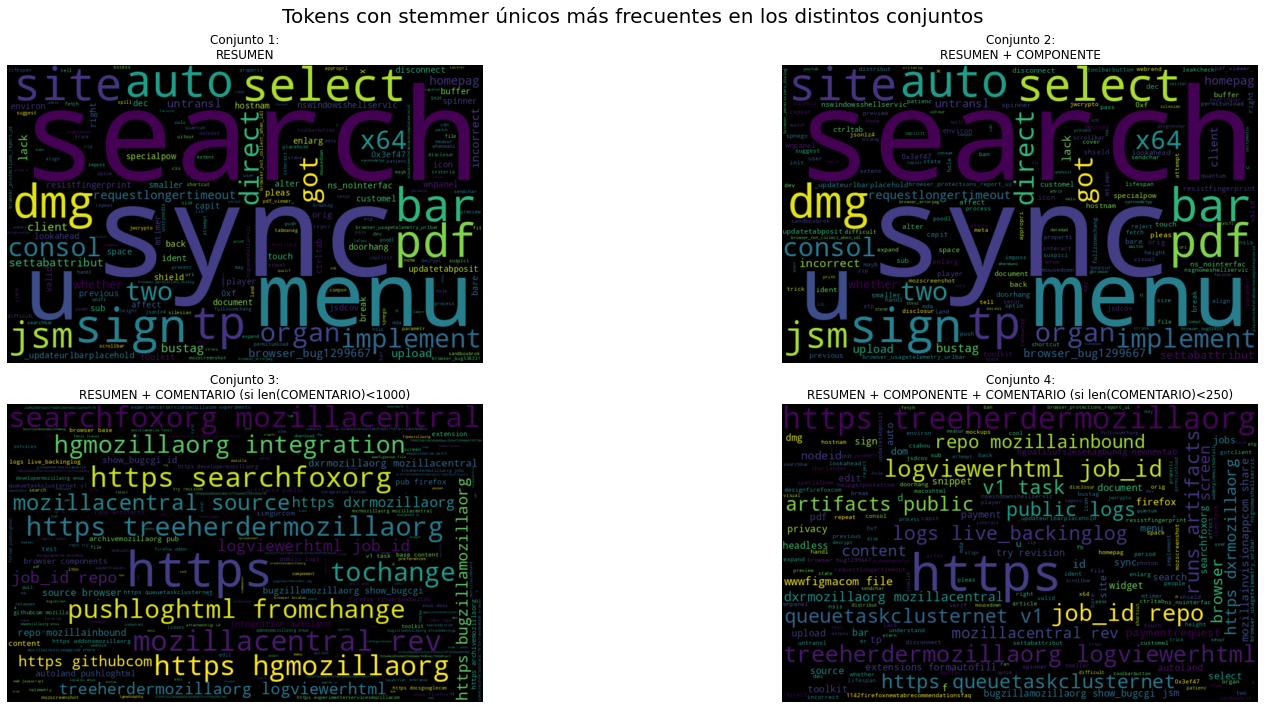

In [17]:
tokens1S_wordcloud = WordCloud(width=800, height=500, random_state=21, max_words=200).generate(' '.join(unique_tokens1S))
tokens2S_wordcloud = WordCloud(width=800, height=500, random_state=21, max_words=200).generate(' '.join(unique_tokens2S))
tokens3S_wordcloud = WordCloud(width=800, height=500, random_state=21, max_words=200).generate(' '.join(unique_tokens3S))
tokens4S_wordcloud = WordCloud(width=800, height=500, random_state=21, max_words=200).generate(' '.join(unique_tokens4S))

fig, axs = plt.subplots(2,2, figsize=(25,10))

axs[0,0].imshow(tokens1S_wordcloud, interpolation='bilinear')
axs[0,0].set_title('Conjunto 1:\nRESUMEN')
axs[0,0].axis('off')

axs[0,1].imshow(tokens2S_wordcloud, interpolation='bilinear')
axs[0,1].set_title('Conjunto 2:\nRESUMEN + COMPONENTE')
axs[0,1].axis('off')

axs[1,0].imshow(tokens3S_wordcloud, interpolation='bilinear')
axs[1,0].set_title('Conjunto 3:\nRESUMEN + COMENTARIO (si len(COMENTARIO)<1000)')
axs[1,0].axis('off')

axs[1,1].imshow(tokens4S_wordcloud, interpolation='bilinear')
axs[1,1].set_title('Conjunto 4:\nRESUMEN + COMPONENTE + COMENTARIO (si len(COMENTARIO)<250)')
axs[1,1].axis('off')

fig.suptitle('Tokens con stemmer únicos más frecuentes en los distintos conjuntos', fontsize=20)
fig.tight_layout()
plt.show()


In [18]:
# eliminar https? en stopwords

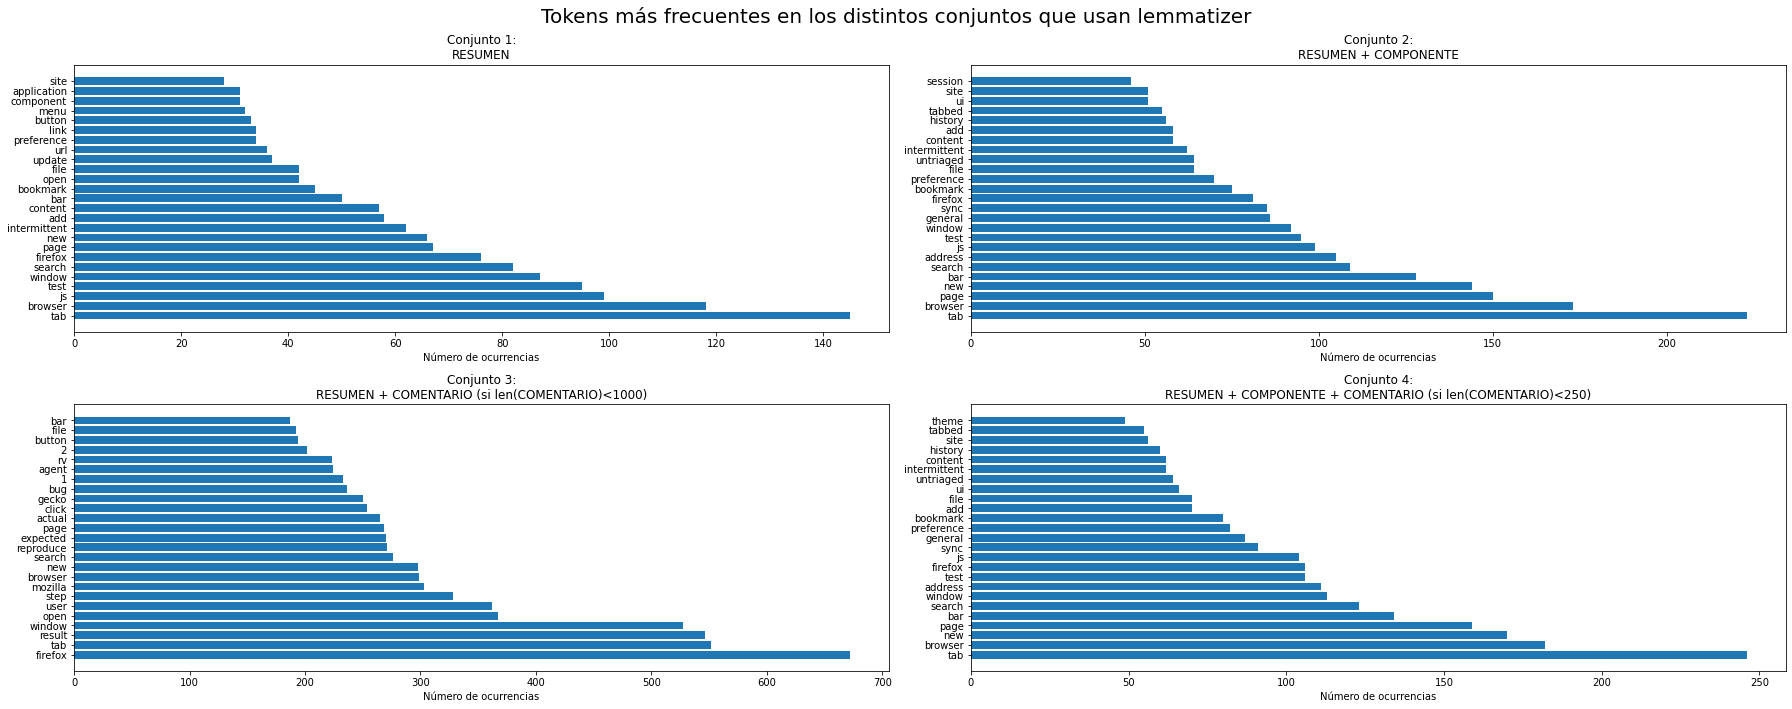

In [19]:
tokens1L_counter = Counter(word for tokens in df_reports['tokens1L'] for word in tokens)
tokens2L_counter = Counter(word for tokens in df_reports['tokens2L'] for word in tokens)
tokens3L_counter = Counter(word for tokens in df_reports['tokens3L'] for word in tokens)
tokens4L_counter = Counter(word for tokens in df_reports['tokens4L'] for word in tokens)

tokens1L_counter_25 = tokens1L_counter.most_common(25)
tokens2L_counter_25 = tokens2L_counter.most_common(25)
tokens3L_counter_25 = tokens3L_counter.most_common(25)
tokens4L_counter_25 = tokens4L_counter.most_common(25)

fig, axs = plt.subplots(2, 2, figsize=(25, 10))

axs[0, 0].barh(range(len(tokens1L_counter_25)), [count for word, count in tokens1L_counter_25], align='center')
axs[0, 0].set_yticks(range(len(tokens1L_counter_25)))
axs[0, 0].set_yticklabels([word for word, count in tokens1L_counter_25])
axs[0, 0].set_title('Conjunto 1:\nRESUMEN')
axs[0, 0].set_xlabel('Número de ocurrencias')

axs[0, 1].barh(range(len(tokens2L_counter_25)), [count for word, count in tokens2L_counter_25], align='center')
axs[0, 1].set_yticks(range(len(tokens2L_counter_25)))
axs[0, 1].set_yticklabels([word for word, count in tokens2L_counter_25])
axs[0, 1].set_title('Conjunto 2:\nRESUMEN + COMPONENTE')
axs[0, 1].set_xlabel('Número de ocurrencias')

axs[1, 0].barh(range(len(tokens3L_counter_25)), [count for word, count in tokens3L_counter_25], align='center')
axs[1, 0].set_yticks(range(len(tokens3L_counter_25)))
axs[1, 0].set_yticklabels([word for word, count in tokens3L_counter_25])
axs[1, 0].set_title('Conjunto 3:\nRESUMEN + COMENTARIO (si len(COMENTARIO)<1000)')
axs[1, 0].set_xlabel('Número de ocurrencias')

axs[1, 1].barh(range(len(tokens4L_counter_25)), [count for word, count in tokens4L_counter_25], align='center')
axs[1, 1].set_yticks(range(len(tokens4L_counter_25)))
axs[1, 1].set_yticklabels([word for word, count in tokens4L_counter_25])
axs[1, 1].set_title('Conjunto 4:\nRESUMEN + COMPONENTE + COMENTARIO (si len(COMENTARIO)<250)')
axs[1, 1].set_xlabel('Número de ocurrencias')

fig.suptitle('Tokens más frecuentes en los distintos conjuntos que usan lemmatizer', fontsize=20)
fig.tight_layout()
plt.show()

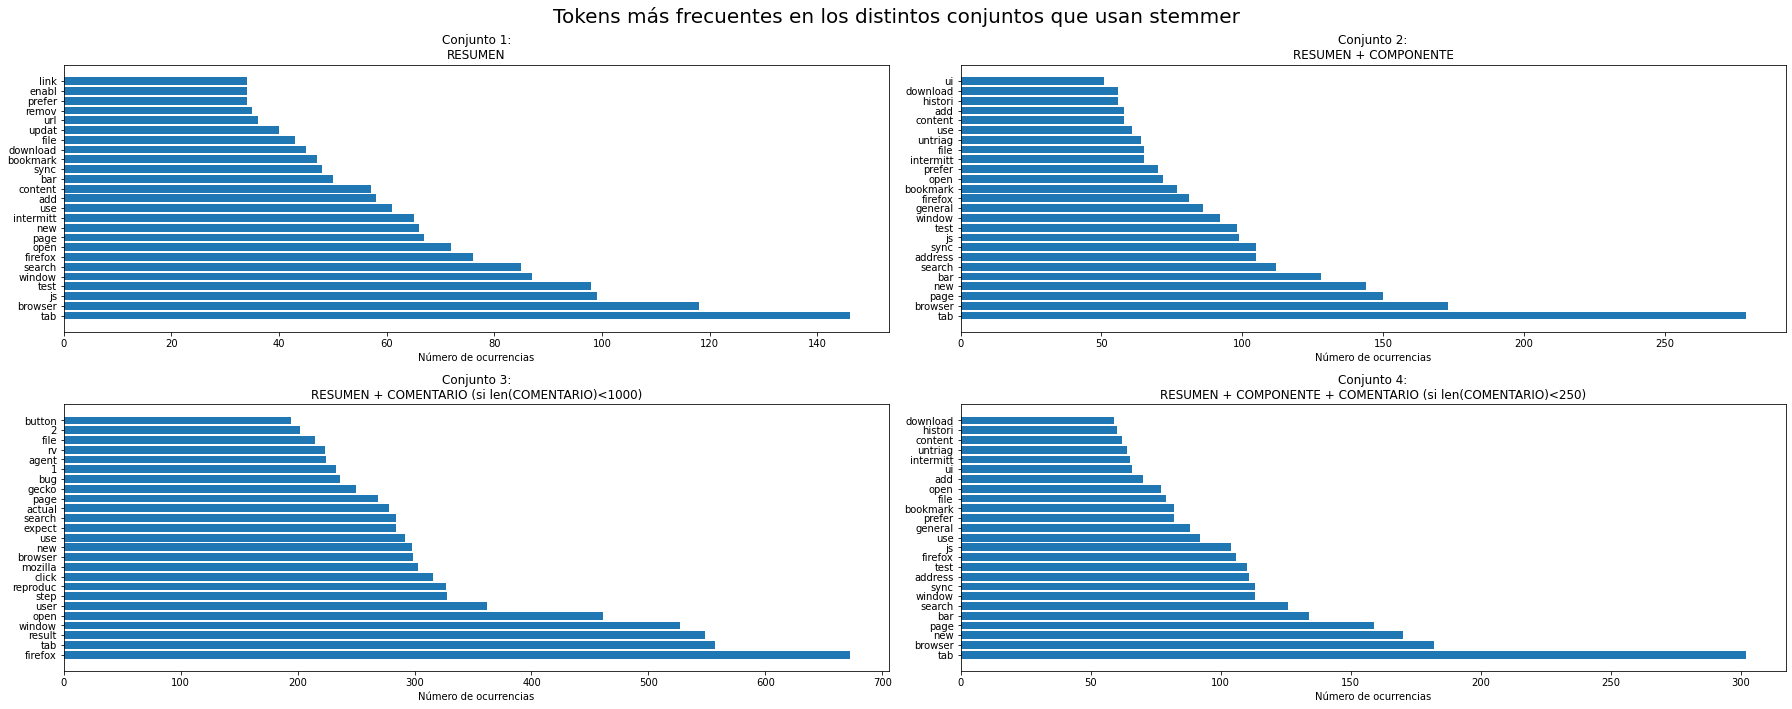

In [20]:
tokens1S_counter = Counter(word for tokens in df_reports['tokens1S'] for word in tokens)
tokens2S_counter = Counter(word for tokens in df_reports['tokens2S'] for word in tokens)
tokens3S_counter = Counter(word for tokens in df_reports['tokens3S'] for word in tokens)
tokens4S_counter = Counter(word for tokens in df_reports['tokens4S'] for word in tokens)

tokens1S_counter_25 = tokens1S_counter.most_common(25)
tokens2S_counter_25 = tokens2S_counter.most_common(25)
tokens3S_counter_25 = tokens3S_counter.most_common(25)
tokens4S_counter_25 = tokens4S_counter.most_common(25)

fig, axs = plt.subplots(2, 2, figsize=(25, 10))

axs[0, 0].barh(range(len(tokens1S_counter_25)), [count for word, count in tokens1S_counter_25], align='center')
axs[0, 0].set_yticks(range(len(tokens1S_counter_25)))
axs[0, 0].set_yticklabels([word for word, count in tokens1S_counter_25])
axs[0, 0].set_title('Conjunto 1:\nRESUMEN')
axs[0, 0].set_xlabel('Número de ocurrencias')

axs[0, 1].barh(range(len(tokens2S_counter_25)), [count for word, count in tokens2S_counter_25], align='center')
axs[0, 1].set_yticks(range(len(tokens2S_counter_25)))
axs[0, 1].set_yticklabels([word for word, count in tokens2S_counter_25])
axs[0, 1].set_title('Conjunto 2:\nRESUMEN + COMPONENTE')
axs[0, 1].set_xlabel('Número de ocurrencias')

axs[1, 0].barh(range(len(tokens3S_counter_25)), [count for word, count in tokens3S_counter_25], align='center')
axs[1, 0].set_yticks(range(len(tokens3S_counter_25)))
axs[1, 0].set_yticklabels([word for word, count in tokens3S_counter_25])
axs[1, 0].set_title('Conjunto 3:\nRESUMEN + COMENTARIO (si len(COMENTARIO)<1000)')
axs[1, 0].set_xlabel('Número de ocurrencias')

axs[1, 1].barh(range(len(tokens4S_counter_25)), [count for word, count in tokens4S_counter_25], align='center')
axs[1, 1].set_yticks(range(len(tokens4S_counter_25)))
axs[1, 1].set_yticklabels([word for word, count in tokens4S_counter_25])
axs[1, 1].set_title('Conjunto 4:\nRESUMEN + COMPONENTE + COMENTARIO (si len(COMENTARIO)<250)')
axs[1, 1].set_xlabel('Número de ocurrencias')

fig.suptitle('Tokens más frecuentes en los distintos conjuntos que usan stemmer', fontsize=20)
fig.tight_layout()
plt.show()

## Por parejas

In [21]:
df_duplicate_pairs = df_report_pairs[df_report_pairs.type == 'duplicate']

In [22]:
import warnings
warnings.filterwarnings('ignore')

df_duplicate_pairs['tokens1ML'] = df_duplicate_pairs['text1M'].apply(preprocess_with_lemmatizer)
df_duplicate_pairs['tokens1DL'] = df_duplicate_pairs['text1D'].apply(preprocess_with_lemmatizer)
df_duplicate_pairs['tokens2ML'] = df_duplicate_pairs['text2M'].apply(preprocess_with_lemmatizer)
df_duplicate_pairs['tokens2DL'] = df_duplicate_pairs['text2D'].apply(preprocess_with_lemmatizer)
df_duplicate_pairs['tokens3ML'] = df_duplicate_pairs['text3M'].apply(preprocess_with_lemmatizer)
df_duplicate_pairs['tokens3DL'] = df_duplicate_pairs['text3D'].apply(preprocess_with_lemmatizer)
df_duplicate_pairs['tokens4ML'] = df_duplicate_pairs['text4M'].apply(preprocess_with_lemmatizer)
df_duplicate_pairs['tokens4DL'] = df_duplicate_pairs['text4D'].apply(preprocess_with_lemmatizer)

df_duplicate_pairs['unique_tokens1ML'] = df_duplicate_pairs['tokens1ML'].apply(set)
df_duplicate_pairs['unique_tokens1DL'] = df_duplicate_pairs['tokens1DL'].apply(set)
df_duplicate_pairs['unique_tokens2ML'] = df_duplicate_pairs['tokens2ML'].apply(set)
df_duplicate_pairs['unique_tokens2DL'] = df_duplicate_pairs['tokens2DL'].apply(set)
df_duplicate_pairs['unique_tokens3ML'] = df_duplicate_pairs['tokens3ML'].apply(set)
df_duplicate_pairs['unique_tokens3DL'] = df_duplicate_pairs['tokens3DL'].apply(set)
df_duplicate_pairs['unique_tokens4ML'] = df_duplicate_pairs['tokens4ML'].apply(set)
df_duplicate_pairs['unique_tokens4DL'] = df_duplicate_pairs['tokens4DL'].apply(set)

df_duplicate_pairs['unique_tokens_len1ML'] = df_duplicate_pairs['unique_tokens1ML'].apply(len)
df_duplicate_pairs['unique_tokens_len1DL'] = df_duplicate_pairs['unique_tokens1DL'].apply(len)
df_duplicate_pairs['unique_tokens_len2ML'] = df_duplicate_pairs['unique_tokens2ML'].apply(len)
df_duplicate_pairs['unique_tokens_len2DL'] = df_duplicate_pairs['unique_tokens2DL'].apply(len)
df_duplicate_pairs['unique_tokens_len3ML'] = df_duplicate_pairs['unique_tokens3ML'].apply(len)
df_duplicate_pairs['unique_tokens_len3DL'] = df_duplicate_pairs['unique_tokens3DL'].apply(len)
df_duplicate_pairs['unique_tokens_len4ML'] = df_duplicate_pairs['unique_tokens4ML'].apply(len)
df_duplicate_pairs['unique_tokens_len4DL'] = df_duplicate_pairs['unique_tokens4DL'].apply(len)

df_duplicate_pairs['common_tokens1L'] = df_duplicate_pairs.apply(lambda row: row['unique_tokens1ML'] & row['unique_tokens1DL'], axis=1)
df_duplicate_pairs['common_tokens2L'] = df_duplicate_pairs.apply(lambda row: row['unique_tokens2ML'] & row['unique_tokens2DL'], axis=1)
df_duplicate_pairs['common_tokens3L'] = df_duplicate_pairs.apply(lambda row: row['unique_tokens3ML'] & row['unique_tokens3DL'], axis=1)
df_duplicate_pairs['common_tokens4L'] = df_duplicate_pairs.apply(lambda row: row['unique_tokens4ML'] & row['unique_tokens4DL'], axis=1)

df_duplicate_pairs['common_tokens_len1L'] = df_duplicate_pairs['common_tokens1L'].apply(len)
df_duplicate_pairs['common_tokens_len2L'] = df_duplicate_pairs['common_tokens2L'].apply(len)
df_duplicate_pairs['common_tokens_len3L'] = df_duplicate_pairs['common_tokens3L'].apply(len)
df_duplicate_pairs['common_tokens_len4L'] = df_duplicate_pairs['common_tokens4L'].apply(len)

In [23]:
df_duplicate_pairs['tokens1MS'] = df_duplicate_pairs['text1M'].apply(preprocess_with_stemmer)
df_duplicate_pairs['tokens1DS'] = df_duplicate_pairs['text1D'].apply(preprocess_with_stemmer)
df_duplicate_pairs['tokens2MS'] = df_duplicate_pairs['text2M'].apply(preprocess_with_stemmer)
df_duplicate_pairs['tokens2DS'] = df_duplicate_pairs['text2D'].apply(preprocess_with_stemmer)
df_duplicate_pairs['tokens3MS'] = df_duplicate_pairs['text3M'].apply(preprocess_with_stemmer)
df_duplicate_pairs['tokens3DS'] = df_duplicate_pairs['text3D'].apply(preprocess_with_stemmer)
df_duplicate_pairs['tokens4MS'] = df_duplicate_pairs['text4M'].apply(preprocess_with_stemmer)
df_duplicate_pairs['tokens4DS'] = df_duplicate_pairs['text4D'].apply(preprocess_with_stemmer)

df_duplicate_pairs['unique_tokens1MS'] = df_duplicate_pairs['tokens1MS'].apply(set)
df_duplicate_pairs['unique_tokens1DS'] = df_duplicate_pairs['tokens1DS'].apply(set)
df_duplicate_pairs['unique_tokens2MS'] = df_duplicate_pairs['tokens2MS'].apply(set)
df_duplicate_pairs['unique_tokens2DS'] = df_duplicate_pairs['tokens2DS'].apply(set)
df_duplicate_pairs['unique_tokens3MS'] = df_duplicate_pairs['tokens3MS'].apply(set)
df_duplicate_pairs['unique_tokens3DS'] = df_duplicate_pairs['tokens3DS'].apply(set)
df_duplicate_pairs['unique_tokens4MS'] = df_duplicate_pairs['tokens4MS'].apply(set)
df_duplicate_pairs['unique_tokens4DS'] = df_duplicate_pairs['tokens4DS'].apply(set)

df_duplicate_pairs['unique_tokens_len1MS'] = df_duplicate_pairs['unique_tokens1MS'].apply(len)
df_duplicate_pairs['unique_tokens_len1DS'] = df_duplicate_pairs['unique_tokens1DS'].apply(len)
df_duplicate_pairs['unique_tokens_len2MS'] = df_duplicate_pairs['unique_tokens2MS'].apply(len)
df_duplicate_pairs['unique_tokens_len2DS'] = df_duplicate_pairs['unique_tokens2DS'].apply(len)
df_duplicate_pairs['unique_tokens_len3MS'] = df_duplicate_pairs['unique_tokens3MS'].apply(len)
df_duplicate_pairs['unique_tokens_len3DS'] = df_duplicate_pairs['unique_tokens3DS'].apply(len)
df_duplicate_pairs['unique_tokens_len4MS'] = df_duplicate_pairs['unique_tokens4MS'].apply(len)
df_duplicate_pairs['unique_tokens_len4DS'] = df_duplicate_pairs['unique_tokens4DS'].apply(len)

df_duplicate_pairs['common_tokens1S'] = df_duplicate_pairs.apply(lambda row: row['unique_tokens1MS'] & row['unique_tokens1DS'], axis=1)
df_duplicate_pairs['common_tokens2S'] = df_duplicate_pairs.apply(lambda row: row['unique_tokens2MS'] & row['unique_tokens2DS'], axis=1)
df_duplicate_pairs['common_tokens3S'] = df_duplicate_pairs.apply(lambda row: row['unique_tokens3MS'] & row['unique_tokens3DS'], axis=1)
df_duplicate_pairs['common_tokens4S'] = df_duplicate_pairs.apply(lambda row: row['unique_tokens4MS'] & row['unique_tokens4DS'], axis=1)

df_duplicate_pairs['common_tokens_len1S'] = df_duplicate_pairs['common_tokens1S'].apply(len)
df_duplicate_pairs['common_tokens_len2S'] = df_duplicate_pairs['common_tokens2S'].apply(len)
df_duplicate_pairs['common_tokens_len3S'] = df_duplicate_pairs['common_tokens3S'].apply(len)
df_duplicate_pairs['common_tokens_len4S'] = df_duplicate_pairs['common_tokens4S'].apply(len)

In [24]:
df_duplicate_pairs[[
    'unique_tokens_len1ML','unique_tokens_len1DL','unique_tokens_len2ML','unique_tokens_len2DL',
    'unique_tokens_len3ML','unique_tokens_len3DL','unique_tokens_len4ML','unique_tokens_len4DL'
]].describe()

,unique_tokens_len1ML,unique_tokens_len1DL,unique_tokens_len2ML,unique_tokens_len2DL,unique_tokens_len3ML,unique_tokens_len3DL,unique_tokens_len4ML,unique_tokens_len4DL
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000
mean,8.220000,7.440000,9.590000,8.690000,30.340000,33.81000,11.650000,9.890000
std,4.604741,4.065921,4.647352,4.076776,20.106896,19.07015,5.835065,4.817676
min,2.000000,2.000000,3.000000,3.000000,3.000000,5.00000,3.000000,3.000000
25%,5.000000,5.000000,6.000000,6.000000,16.000000,16.75000,7.000000,6.000000
50%,7.000000,6.000000,8.000000,8.000000,26.000000,33.00000,10.000000,9.000000
75%,10.000000,9.000000,12.000000,10.000000,48.250000,49.25000,15.500000,11.000000
max,24.000000,23.000000,25.000000,25.000000,72.000000,74.00000,29.000000,25.000000


In [25]:
df_duplicate_pairs[[
    'unique_tokens_len1MS','unique_tokens_len1DS','unique_tokens_len2MS','unique_tokens_len2DS',
    'unique_tokens_len3MS','unique_tokens_len3DS','unique_tokens_len4MS','unique_tokens_len4DS'
]].describe()

,unique_tokens_len1MS,unique_tokens_len1DS,unique_tokens_len2MS,unique_tokens_len2DS,unique_tokens_len3MS,unique_tokens_len3DS,unique_tokens_len4MS,unique_tokens_len4DS
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000
mean,8.200000,7.390000,9.470000,8.500000,29.420000,32.810000,11.470000,9.66000
std,4.585881,4.057404,4.639434,4.008829,19.233903,18.224578,5.684384,4.73376
min,2.000000,2.000000,2.000000,2.000000,3.000000,5.000000,2.000000,2.00000
25%,5.000000,5.000000,6.000000,6.000000,15.750000,16.000000,7.000000,6.00000
50%,7.000000,6.000000,8.500000,8.000000,25.500000,32.000000,10.000000,9.00000
75%,10.000000,9.000000,11.250000,10.000000,45.000000,47.500000,15.250000,11.00000
max,24.000000,23.000000,25.000000,25.000000,70.000000,70.000000,28.000000,25.00000


In [26]:
df_duplicate_pairs[[
    'common_tokens_len1L','common_tokens_len2L','common_tokens_len3L','common_tokens_len4L'
]].describe()

,common_tokens_len1L,common_tokens_len2L,common_tokens_len3L,common_tokens_len4L
count,100.00000,100.000000,100.000000,100.000000
mean,2.41000,3.230000,8.080000,3.350000
std,3.18486,3.225075,7.636542,3.331439
min,0.00000,0.000000,0.000000,0.000000
25%,1.00000,2.000000,2.000000,2.000000
50%,2.00000,2.000000,5.000000,3.000000
75%,3.00000,4.000000,13.000000,4.000000
max,20.00000,20.000000,40.000000,20.000000


In [27]:
df_duplicate_pairs[[
    'common_tokens_len1S','common_tokens_len2S','common_tokens_len3S','common_tokens_len4S'
]].describe()

,common_tokens_len1S,common_tokens_len2S,common_tokens_len3S,common_tokens_len4S
count,100.000000,100.000000,100.000000,100.000000
mean,2.580000,3.330000,8.390000,3.450000
std,3.159657,3.152857,7.635503,3.254756
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,3.000000,2.000000
50%,2.000000,3.000000,5.000000,3.000000
75%,3.000000,4.000000,13.000000,4.000000
max,20.000000,20.000000,38.000000,20.000000


In [28]:
TOP_TOKENS = 25
def get_TOP_most_frequent_common_tokens(df, column):
    rank = {}
    for i, row in df.iterrows():
        for t in row[column]:
            if t in rank:
                rank[t] +=1
            else:
                rank[t] = 1
    return sorted(rank.items(), key=lambda x: x[1], reverse=True)[:TOP_TOKENS]

rank_1L = get_TOP_most_frequent_common_tokens(df_duplicate_pairs, 'common_tokens1L')
rank_2L = get_TOP_most_frequent_common_tokens(df_duplicate_pairs, 'common_tokens2L')
rank_3L = get_TOP_most_frequent_common_tokens(df_duplicate_pairs, 'common_tokens3L')
rank_4L = get_TOP_most_frequent_common_tokens(df_duplicate_pairs, 'common_tokens4L')
rank_1S = get_TOP_most_frequent_common_tokens(df_duplicate_pairs, 'common_tokens1S')
rank_2S = get_TOP_most_frequent_common_tokens(df_duplicate_pairs, 'common_tokens2S')
rank_3S = get_TOP_most_frequent_common_tokens(df_duplicate_pairs, 'common_tokens3S')
rank_4S = get_TOP_most_frequent_common_tokens(df_duplicate_pairs, 'common_tokens4S')

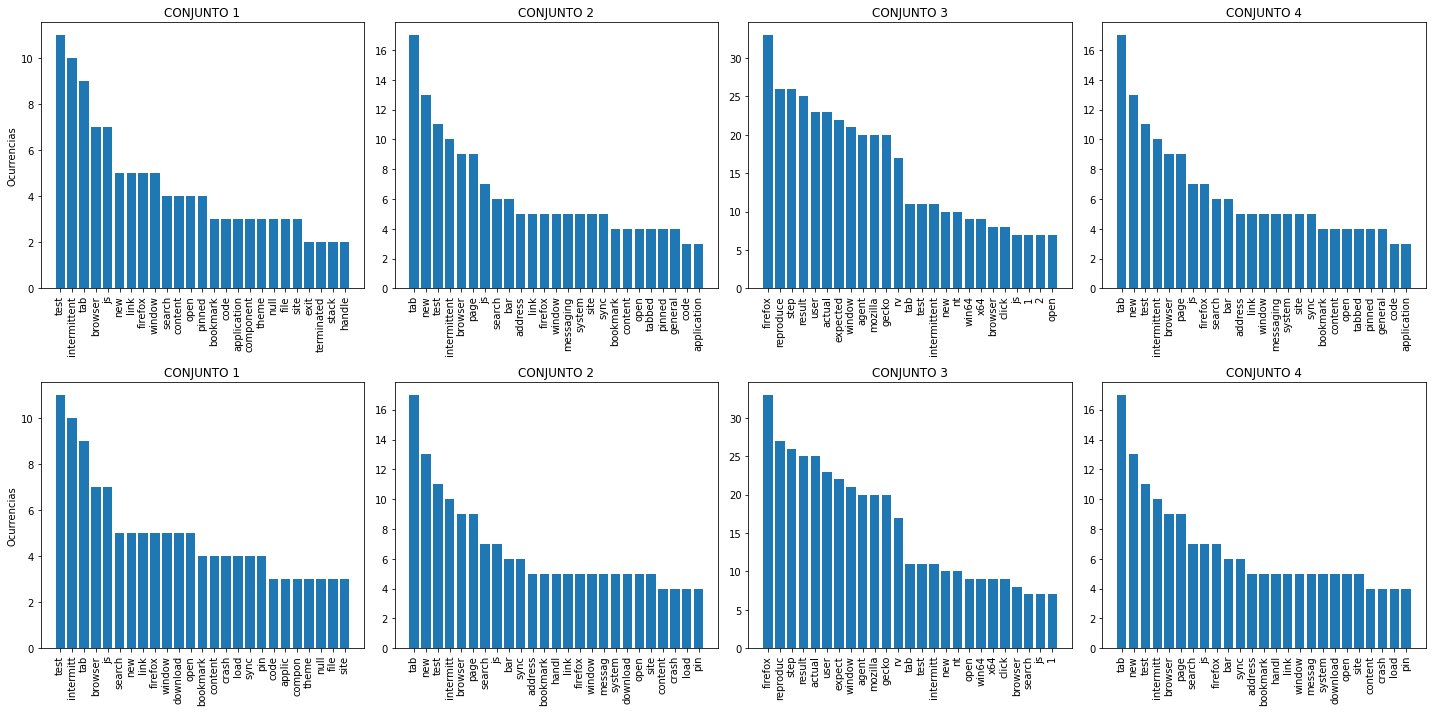

In [29]:
fig, axs = plt.subplots(2, 4, figsize=(20,10))

# fig.set_title("Tokens compartidos entre Maestro y Duplicado más comunes")

axs[0,0].bar(range(len(rank_1L)), [x[1] for x in rank_1L], align='center')
axs[0,0].set_xticks(range(len(rank_1L)), [x[0] for x in rank_1L], rotation=90)
axs[0,0].set_ylabel('Ocurrencias')
axs[0,0].set_title('CONJUNTO 1')

axs[1,0].bar(range(len(rank_1S)), [x[1] for x in rank_1S], align='center')
axs[1,0].set_xticks(range(len(rank_1S)), [x[0] for x in rank_1S], rotation=90)
axs[1,0].set_ylabel('Ocurrencias')
axs[1,0].set_title('CONJUNTO 1')

axs[0,1].bar(range(len(rank_2L)), [x[1] for x in rank_2L], align='center')
axs[0,1].set_xticks(range(len(rank_2L)), [x[0] for x in rank_2L], rotation=90)
axs[0,1].set_title('CONJUNTO 2')

axs[1,1].bar(range(len(rank_2S)), [x[1] for x in rank_2S], align='center')
axs[1,1].set_xticks(range(len(rank_2S)), [x[0] for x in rank_2S], rotation=90)
axs[1,1].set_title('CONJUNTO 2')

axs[0,2].bar(range(len(rank_3L)), [x[1] for x in rank_3L], align='center')
axs[0,2].set_xticks(range(len(rank_3L)), [x[0] for x in rank_3L], rotation=90)
axs[0,2].set_title('CONJUNTO 3')

axs[1,2].bar(range(len(rank_3S)), [x[1] for x in rank_3S], align='center')
axs[1,2].set_xticks(range(len(rank_3S)), [x[0] for x in rank_3S], rotation=90)
axs[1,2].set_title('CONJUNTO 3')

axs[0,3].bar(range(len(rank_4L)), [x[1] for x in rank_4L], align='center')
axs[0,3].set_xticks(range(len(rank_4L)), [x[0] for x in rank_4L], rotation=90)
axs[0,3].set_title('CONJUNTO 4')

axs[1,3].bar(range(len(rank_4S)), [x[1] for x in rank_4S], align='center')
axs[1,3].set_xticks(range(len(rank_4S)), [x[0] for x in rank_4S], rotation=90)
axs[1,3].set_title('CONJUNTO 4')

fig.tight_layout()
plt.show()

# Añadir tokenes a dataframes

In [34]:
df_report_pairs['tokens1ML'] = df_report_pairs['text1M'].apply(preprocess_with_lemmatizer)
df_report_pairs['tokens2ML'] = df_report_pairs['text2M'].apply(preprocess_with_lemmatizer)
df_report_pairs['tokens3ML'] = df_report_pairs['text3M'].apply(preprocess_with_lemmatizer)
df_report_pairs['tokens4ML'] = df_report_pairs['text4M'].apply(preprocess_with_lemmatizer)
df_report_pairs['tokens1MS'] = df_report_pairs['text1M'].apply(preprocess_with_stemmer)
df_report_pairs['tokens2MS'] = df_report_pairs['text2M'].apply(preprocess_with_stemmer)
df_report_pairs['tokens3MS'] = df_report_pairs['text3M'].apply(preprocess_with_stemmer)
df_report_pairs['tokens4MS'] = df_report_pairs['text4M'].apply(preprocess_with_stemmer)

df_report_pairs['tokens1DL'] = df_report_pairs['text1D'].apply(preprocess_with_lemmatizer)
df_report_pairs['tokens2DL'] = df_report_pairs['text2D'].apply(preprocess_with_lemmatizer)
df_report_pairs['tokens3DL'] = df_report_pairs['text3D'].apply(preprocess_with_lemmatizer)
df_report_pairs['tokens4DL'] = df_report_pairs['text4D'].apply(preprocess_with_lemmatizer)
df_report_pairs['tokens1DS'] = df_report_pairs['text1D'].apply(preprocess_with_stemmer)
df_report_pairs['tokens2DS'] = df_report_pairs['text2D'].apply(preprocess_with_stemmer)
df_report_pairs['tokens3DS'] = df_report_pairs['text3D'].apply(preprocess_with_stemmer)
df_report_pairs['tokens4DS'] = df_report_pairs['text4D'].apply(preprocess_with_stemmer)

# Persistir

In [35]:
import os

if not os.path.exists('data'):
    os.makedirs('data')

df_reports.to_pickle('data/preprocessed_reports.pkl')
df_report_pairs[[
    'type', 'id_M', 'id_D', 'statusM', 'statusD',  'componentM', 'componentD',
    'summaryM', 'summaryD', 'commentsM',  'commentsD',
    'text1M', 'text1D', 'text2M', 'text2D', 'text3M', 'text3D', 'text4M', 'text4D',
    'tokens1ML', 'tokens2ML', 'tokens3ML', 'tokens4ML', 'tokens1DL', 'tokens2DL', 'tokens3DL', 'tokens4DL',
    'tokens1MS', 'tokens2MS', 'tokens3MS', 'tokens4MS', 'tokens1DS', 'tokens2DS', 'tokens3DS', 'tokens4DS'
]].to_pickle('data/preprocessed_report_pairs.pkl')